# **Implementation of Bayesian Networks in Google Colab**

# Exercise 1: Setting Up The Environment

**Install the Required Library**

In [14]:
!pip install pgmpy

**Import Libraries**

In [15]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# Exercise 2: Building a Simple Bayesian Network

**Define the Structure**

In [16]:
model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

**Define Conditional Probability Tables (CPTs)**

In [17]:
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.8], [0.2]])

cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.9, 0.5], [0.1, 0.5]],
                         evidence=['Weather'],
                         evidence_card=[2])

cpd_late = TabularCPD(variable='Late', variable_card=2,
                     values=[[0.95, 0.4], [0.05, 0.6]],
                     evidence=['Traffic'],
                     evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

# Exercise 3: Querying the Bayesian Network

**Perform Exact Inference**

In [18]:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


# Exercise 4: Parameter Learning

**Simulate a Dataset**

In [19]:
data = pd.DataFrame({
    'Weather': np.random.choice([0,1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 0].shape[0],
    p=[0.9, 0.1]
)

data.loc[data['Weather'] == 1 , 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0,1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0,1], size=data.shape[0], p=[0.4, 0.6])
)

**Estimate the Parameters**

In [20]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
    print(cpd)

+------------+-------+
| Weather(0) | 0.783 |
+------------+-------+
| Weather(1) | 0.217 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.913154533844189   | 0.48847926267281105 |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.08684546615581099 | 0.511520737327189   |
+--------------+---------------------+---------------------+
+---------+----------------------+--------------------+
| Traffic | Traffic(0.0)         | Traffic(1.0)       |
+---------+----------------------+--------------------+
| Late(0) | 0.9524969549330086   | 0.4022346368715084 |
+---------+----------------------+--------------------+
| Late(1) | 0.047503045066991476 | 0.5977653631284916 |
+---------+----------------------+--------------------+


# Exercise 5: Visualizing the Bayesian Network

**Visualize the Network Structure**

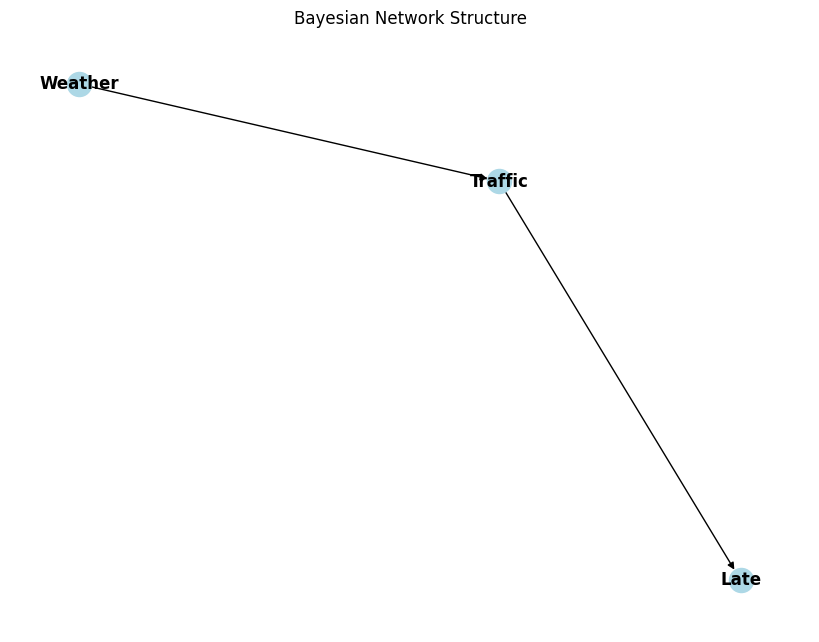

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())
nx_graph.add_nodes_from(model.nodes())

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos,
    with_labels=True, node_color='lightblue',
    font_weight='bold', arrows=True
)
plt.title("Bayesian Network Structure")
plt.show()